<a href="https://colab.research.google.com/github/Hur-Ali110/Data-Science-Internship/blob/main/Task_1_(Data_Science_Intern).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌸 Task 1: Exploring and Visualizing the Iris Dataset

## 🎯 Objective
The goal of this task is to **understand the structure and distribution of the Iris dataset** through data loading, summarization, and visualization techniques. This is a foundational exercise in exploratory data analysis (EDA) using Python libraries like **Pandas**, **Matplotlib**, and **Seaborn**.

---

## 📂 Dataset
- **Name:** Iris Dataset
- **Source:** Available through the `seaborn` library (`sns.load_dataset('iris')`)
- **Description:** Contains measurements of **sepal length**, **sepal width**, **petal length**, and **petal width** for three different species of Iris flowers.

---

## 🛠️ Approach

### 🔹 1. Data Loading & Inspection
- Loaded the dataset using `seaborn.load_dataset('iris')`
- Displayed:
  - First few rows using `.head()`
  - Dataset shape using `.shape`
  - Column names using `.columns`
  - Data types and missing values using `.info()`
  - Summary statistics using `.describe()`

### 🔹 2. Data Cleaning
- Checked for missing values with `.isnull().sum()`
- Created a reusable function `remove_outliers_iqr()` to remove outliers using the **IQR (Interquartile Range)** method
- Displayed dataset shape before and after outlier removal

### 🔹 3. Visualizations
Used **Seaborn** and **Matplotlib** for various plots:

#### 📌 Scatter Plots
- **Sepal Length vs Sepal Width** by species
- **Petal Length vs Petal Width** by species

#### 📌 Histograms
- Distribution of all four numeric features (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`) with KDE overlay

#### 📌 Box Plots
- Compared spread and outliers of all features
- Displayed box plots before and after outlier removal

---

## 📊 Results & Insights

### 🔍 Data Observations
- No missing values were found in the dataset.
- All numeric features were well-distributed, with a few outliers.
- Outliers were most noticeable in **sepal width** and **petal width**.
- After applying the IQR method, the dataset reduced in size, cleaning up extreme values.

### 🌸 Species Patterns
- **Setosa** species is easily separable in both petal and sepal dimensions.
- **Versicolor** and **Virginica** show more overlap in feature space but still demonstrate distinguishable patterns.

---

## 🧰 Libraries Used
- `numpy`
- `pandas`
- `matplotlib.pyplot`
- `seaborn`

---

## 📁 Files Included
- `iris_exploration.ipynb` – Jupyter/Colab notebook with all code
- `README.md` – Summary and documentation

---

## 🔄 Next Steps
- Add pairplots for multivariate visualization.
- Apply PCA for dimensionality reduction.
- Train a simple classifier like KNN or Logistic Regression for species prediction.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = sns.load_dataset('iris')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
print(df.shape)

(150, 5)


In [ ]:
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


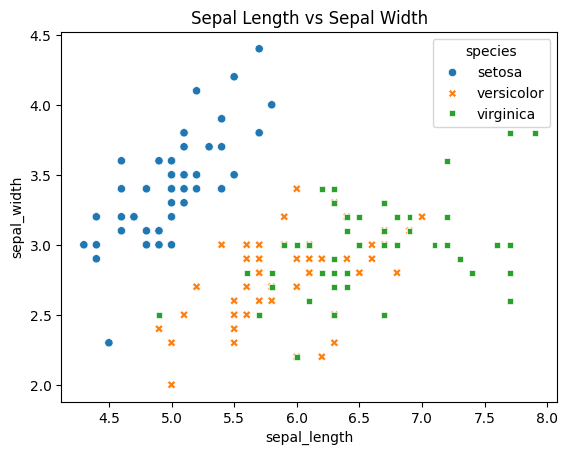

In [ ]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species", style="species")

plt.title("Sepal Length vs Sepal Width")
plt.show()

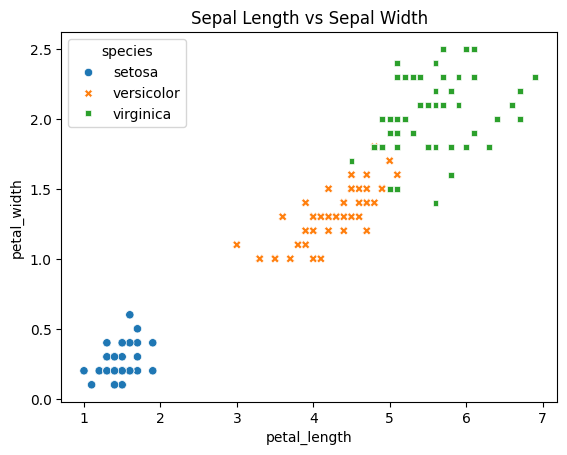

In [ ]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species", style="species")

plt.title("Sepal Length vs Sepal Width")
plt.show()

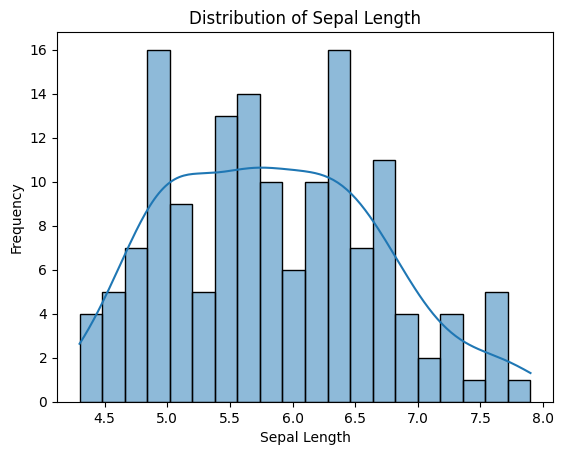

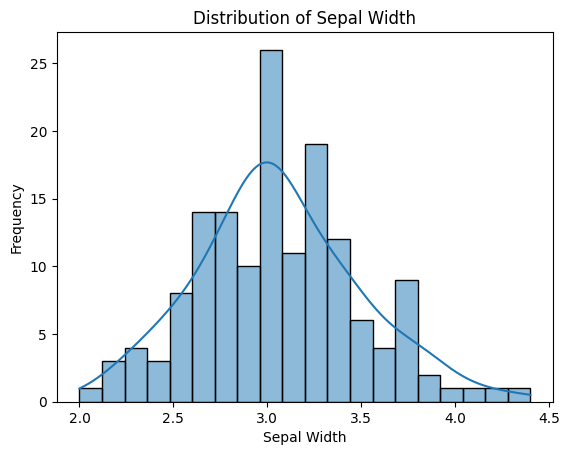

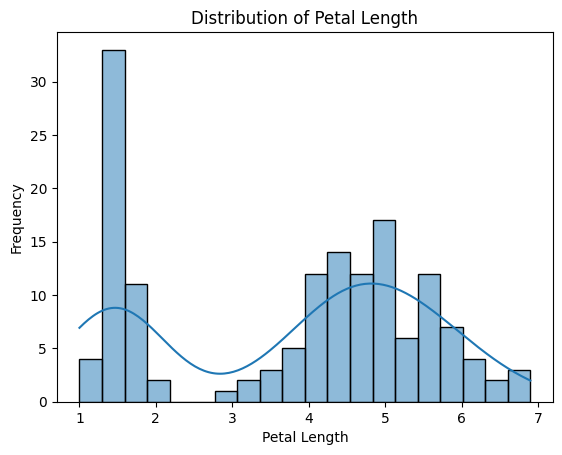

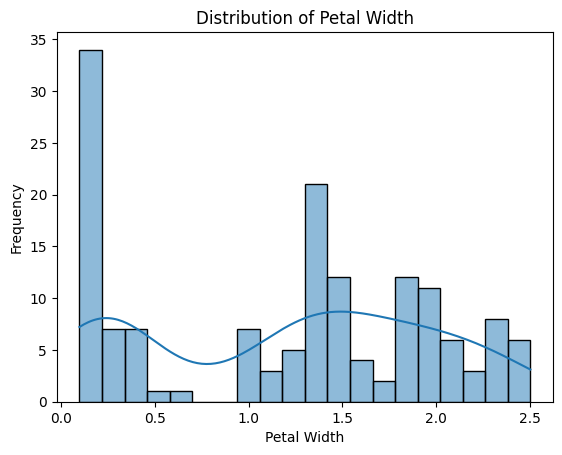

In [ ]:
for col in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f"Distribution of {col.replace('_', ' ').title()}")
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel("Frequency")
    plt.show()

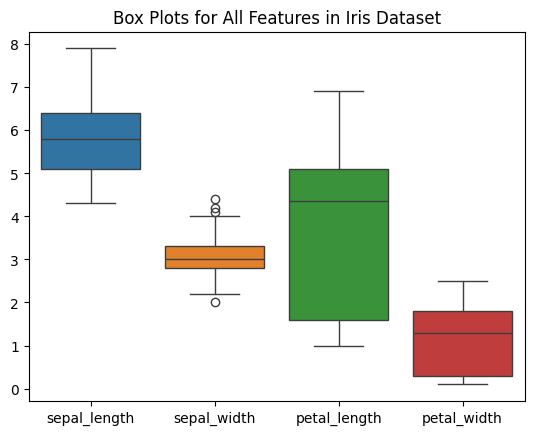

In [ ]:
sns.boxplot(data=df)
plt.title("Box Plots for All Features in Iris Dataset")
plt.show()

In [ ]:
def remove_outliers_iqr(data):
    numeric_cols = data.select_dtypes(include='number').columns
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

In [ ]:
# Apply function
df_cleaned = remove_outliers_iqr(df)

# Print before and after
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_cleaned.shape)

df = df_cleaned

Original shape: (150, 5)
Shape after removing outliers: (146, 5)


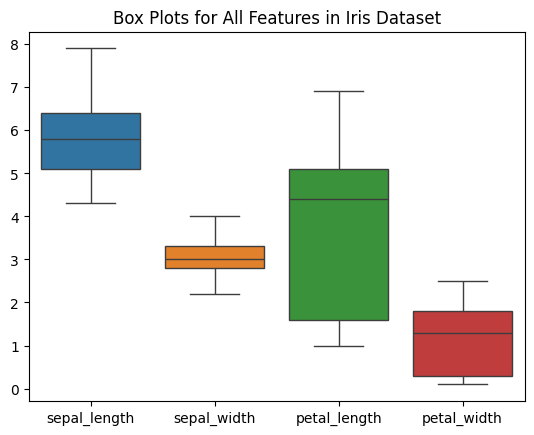

In [ ]:
sns.boxplot(data=df)
plt.title("Box Plots for All Features in Iris Dataset")
plt.show()